# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
%pylab inline 
import pickle 
import numpy as np
import cv2
from sklearn.utils import shuffle


Populating the interactive namespace from numpy and matplotlib


In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = shuffle(train['features'], train['labels'])
X_valid, y_valid = shuffle(valid['features'], valid['labels'])
X_test, y_test = test['features'], test['labels']

In [3]:
import random
import pandas as pd

signames = pd.read_csv('signnames.csv', index_col=0)['SignName']

### Visualizing dataset
taking random pictures

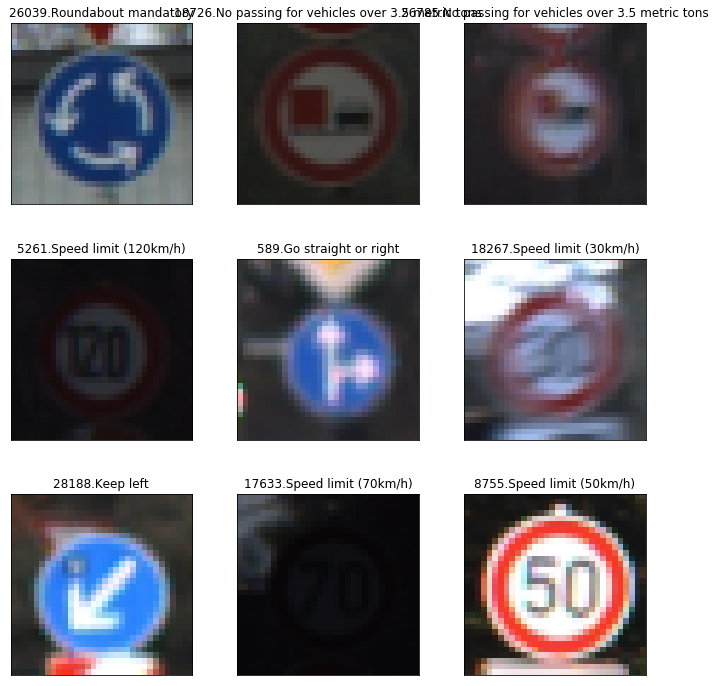

In [4]:
fig, axes = subplots(3, 3, figsize=(12, 12),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)


random_idx = random.sample(range(len(X_train)), 9)

for ax, i in zip(axes.flat, random_idx):
    ax.imshow(X_train[i])
    ax.set_title(str(i) +'.' + signames[y_train[i]])
show()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [5]:
from scipy.misc import imresize

In [6]:
s_train = train['sizes']
c_train = train['coords']

(32, 32, 3)
(50, 55, 3)
No vehicles


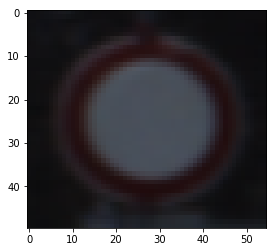

In [7]:
img_n = randint(0, len(X_train))
oimg = X_train[img_n].copy()
img = imresize(oimg.copy(), s_train[img_n])

imshow(img)
print(oimg.shape)
print(img.shape)
print(signames[y_train[img_n]])

### Trying to see what can give the other information in the data set

[ 6  6 45 50]


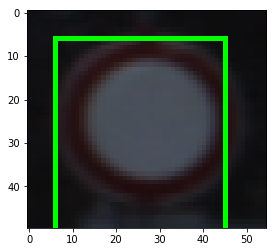

In [8]:
img = cv2.rectangle(img, tuple(c_train[img_n][:2]), tuple(c_train[img_n][2:]), [0,255,0], 1)

imshow(img)
print(c_train[img_n])

I don't really see, how I can use this boundry...

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [9]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]
n_valid = y_valid.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [10]:
from collections import Counter
import operator

2010 (5.78%) [ 2]Speed limit (50km/h)
1980 (5.69%) [ 1]Speed limit (30km/h)
1920 (5.52%) [13]Yield
1890 (5.43%) [12]Priority road
1860 (5.34%) [38]Keep right
1800 (5.17%) [10]No passing for vehicles over 3.5 metric tons
1770 (5.09%) [ 4]Speed limit (70km/h)
1650 (4.74%) [ 5]Speed limit (80km/h)
1350 (3.88%) [25]Road work
1320 (3.79%) [ 9]No passing
1290 (3.71%) [ 7]Speed limit (100km/h)
1260 (3.62%) [ 3]Speed limit (60km/h)
1260 (3.62%) [ 8]Speed limit (120km/h)
1170 (3.36%) [11]Right-of-way at the next intersection
1080 (3.10%) [18]General caution
1080 (3.10%) [35]Ahead only
 990 (2.84%) [17]No entry
 690 (1.98%) [14]Stop
 690 (1.98%) [31]Wild animals crossing
 599 (1.72%) [33]Turn right ahead
 540 (1.55%) [15]No vehicles
 540 (1.55%) [26]Traffic signals
 480 (1.38%) [28]Children crossing
 450 (1.29%) [23]Slippery road
 390 (1.12%) [30]Beware of ice/snow
 360 (1.03%) [ 6]End of speed limit (80km/h)
 360 (1.03%) [16]Vehicles over 3.5 metric tons prohibited
 360 (1.03%) [34]Turn left ah

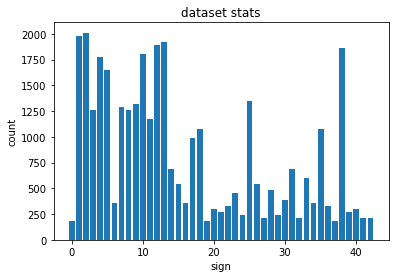

In [11]:
def label_stat(labels):
    sign_counter = Counter()
    for label in labels:
        sign_counter[label] += 1
    n_train = len(labels)
    for label, count in sorted(sign_counter.items(), key=operator.itemgetter(1), reverse=True):
        print("{1:4} ({2:.2f}%) [{3:2}]{0}".format(signames[label], count, count/n_train * 100, label))

    l = list(sign_counter.items())
    plt.bar([k[0] for k in l],[k[1] for k in l])
    plt.title('dataset stats')
    plt.ylabel('count')
    plt.xlabel('sign')
    plt.show()
label_stat(y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
from time import time
from winsound import Beep

## Preprocessing all the data first

### Image augmentation
To increase validation and test accuracy I decided to generate more training data using Keras ImageDataGenerator

In [14]:
import image_preproc

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [15]:
from collections import Counter

In [16]:
count_train = Counter(y_train)

#### Sort all the images

In [17]:
X_train_sort = {}
y_train_sort = {}
for sign in range(n_classes):
    X_train_sort[sign] = np.empty((0,*X_train.shape[1:]), dtype=np.ubyte)
    y_train_sort[sign] = np.empty((0,), dtype=np.ubyte)
for i in range(len(X_train)):
    sign = y_train[i]
    X_train_sort[sign] = np.append(X_train_sort[sign], X_train[i:i+1], axis=0)
    y_train_sort[sign] = np.append(y_train_sort[sign], y_train[i:i+1], axis=0)

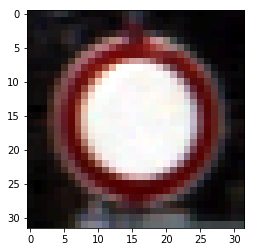

In [19]:
imshow(image_preproc.imadjust(oimg))

#### Now I have a dictionary {sign: [images]}

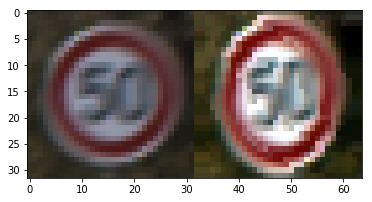

In [20]:
# set up image data generator first
train_datagen = ImageDataGenerator(zoom_range=0.2,
                                   rotation_range=5,
                                   preprocessing_function=image_preproc.imadjust)
sign = 2
pic_num = 1
train_generator = train_datagen.flow(X_train_sort[sign][pic_num:pic_num+1], y_train_sort[sign][pic_num:pic_num+1],batch_size=1)
for i,im in zip(range(1), train_generator):
    img = im[0][0].astype(np.ubyte)
    imshow(np.hstack((X_train_sort[sign][pic_num],img)))

In [21]:
XG_train = X_train.copy()
YG_train = y_train.copy()
max_cnt = 3000
for sign in range(n_classes):
    train_generator = train_datagen.flow(X_train_sort[sign], y_train_sort[sign],batch_size=100)
    sign_cnt = len(y_train_sort[sign])
    if sign_cnt < max_cnt:
        for i,im in zip(range(int((max_cnt - len(y_train_sort[sign]))/100 + 1)), train_generator):
            XG_train = np.append(XG_train, im[0].astype(np.ubyte), axis=0)
            YG_train = np.append(YG_train, im[1], axis=0)
Beep(2500, 1000)

3100 (2.52%) [10]No passing for vehicles over 3.5 metric tons
3100 (2.52%) [20]Dangerous curve to the right
3100 (2.52%) [40]Roundabout mandatory
3095 (2.51%) [33]Turn right ahead
3090 (2.51%) [12]Priority road
3080 (2.50%) [ 1]Speed limit (30km/h)
3080 (2.50%) [ 7]Speed limit (100km/h)
3070 (2.49%) [ 4]Speed limit (70km/h)
3070 (2.49%) [17]No entry
3060 (2.49%) [14]Stop
3060 (2.49%) [18]General caution
3060 (2.49%) [31]Wild animals crossing
3060 (2.49%) [35]Ahead only
3060 (2.49%) [38]Keep right
3050 (2.48%) [ 5]Speed limit (80km/h)
3040 (2.47%) [11]Right-of-way at the next intersection
3030 (2.46%) [30]Beware of ice/snow
3020 (2.45%) [ 3]Speed limit (60km/h)
3020 (2.45%) [ 8]Speed limit (120km/h)
3020 (2.45%) [13]Yield
3010 (2.45%) [ 2]Speed limit (50km/h)
3000 (2.44%) [25]Road work
2980 (2.42%) [28]Children crossing
2940 (2.39%) [ 9]No passing
2820 (2.29%) [ 6]End of speed limit (80km/h)
2820 (2.29%) [16]Vehicles over 3.5 metric tons prohibited
2820 (2.29%) [34]Turn left ahead
2800 

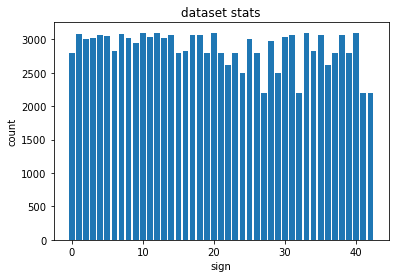

In [22]:
label_stat(YG_train)

The new distribution looks better

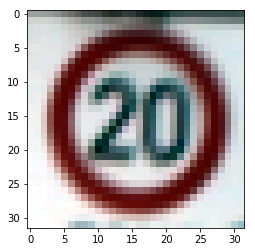

In [23]:
# an example of generated image
imshow(XG_train[X_train.shape[0]+10])

In [24]:
# shuffle the train data
XG_train, YG_train = shuffle(XG_train, YG_train)

#### Encode labels as one-hot data

In [25]:
label_binarizer = LabelBinarizer()
yg_one_hot_train = label_binarizer.fit_transform(YG_train)
y_one_hot_valid = label_binarizer.fit_transform(y_valid)
y_one_hot_test = label_binarizer.fit_transform(y_test)

In [26]:
dataset_path = 'gen_dataset/'
np.save(dataset_path + 'X_test.npy', X_test)
np.save(dataset_path + 'X_valid.npy', X_valid)
np.save(dataset_path + 'XG_train.npy', XG_train)
np.save(dataset_path + 'y_one_hot_test.npy', y_one_hot_test)
np.save(dataset_path + 'y_one_hot_valid.npy', y_one_hot_valid)
np.save(dataset_path + 'y_one_hot_train.npy', yg_one_hot_train)

## checkpoint

In [ ]:
dataset_path = 'gen_dataset/'
# checkpoint
XG_train = np.load(dataset_path + 'XG_train.npy')
X_valid = np.load(dataset_path + 'X_valid.npy')
X_test = np.load(dataset_path + 'X_test.npy')

yg_one_hot_train = np.load(dataset_path + 'y_one_hot_train.npy')
y_one_hot_valid = np.load(dataset_path + 'y_one_hot_valid.npy')
y_one_hot_test = np.load(dataset_path + 'y_one_hot_test.npy')

### Model Architecture



In [27]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from keras.models import Model
from keras.layers import Cropping2D, Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Lambda, concatenate, Activation
from keras import initializers
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [48]:
def build_model_distor():
    winit = initializers.TruncatedNormal(stddev=0.05)
    
    input_img = Input(shape=image_shape)
    norm = Lambda(lambda x: x/127.5 - 1.)(input_img)
    # 32x32x3    
    conv3 = Conv2D(32, (3,3), padding='same', kernel_initializer=winit, activation='relu')(norm)
    
    drop = Dropout(0.7)(conv3)
    
    pool = MaxPooling2D((2,2))(drop)
    # 16x16x32
    conv3 = Conv2D(64, (3,3), padding='valid', kernel_initializer=winit, activation='relu')(pool)
    
    # 14x14x64
    pool = MaxPooling2D((2,2))(conv3)
    # 7x7x64
    conv = Conv2D(128, (3,3), padding='valid', kernel_initializer=winit, activation='relu')(pool)
    # 5x5x128
    conv = Dropout(0.7)(conv)
    flat = Flatten()(conv)
    dense1 = Dense(256,activation='relu', kernel_initializer=winit)(flat)
                
    drop = Dropout(0.5)(dense1)
    dense2 = Dense(1024,activation='relu', kernel_initializer=winit)(drop)
    output_layer = Dense(n_classes, activation='softmax')(dense2)
        
    model = Model(inputs=input_img, outputs=output_layer)
    return model

In [49]:
model_dist = build_model_distor()
model_dist.compile('adam', 'categorical_crossentropy', ['accuracy'])

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [50]:
history = model_dist.fit(XG_train, yg_one_hot_train, 
                    epochs=100, verbose=2, batch_size=128,
                    validation_data=(X_valid, y_one_hot_valid),
                    callbacks=[
                        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=2),
                        ModelCheckpoint("LeNet_onImadjust/m5.{epoch:02d}-{val_loss:.4f}.hdf5"),
                        EarlyStopping(monitor='val_loss', patience=20, verbose=2, min_delta=1e-03)])

Beep(2500, 1000)

Train on 123075 samples, validate on 4410 samples
Epoch 1/100
42s - loss: 0.9966 - acc: 0.6948 - val_loss: 0.4423 - val_acc: 0.9011
Epoch 2/100
40s - loss: 0.2923 - acc: 0.9068 - val_loss: 0.3140 - val_acc: 0.9234
Epoch 3/100
40s - loss: 0.2137 - acc: 0.9327 - val_loss: 0.2284 - val_acc: 0.9449
Epoch 4/100
40s - loss: 0.1785 - acc: 0.9437 - val_loss: 0.2338 - val_acc: 0.9463
Epoch 5/100
40s - loss: 0.1571 - acc: 0.9506 - val_loss: 0.1936 - val_acc: 0.9612
Epoch 6/100
40s - loss: 0.1507 - acc: 0.9542 - val_loss: 0.1801 - val_acc: 0.9553
Epoch 7/100
40s - loss: 0.1361 - acc: 0.9583 - val_loss: 0.2047 - val_acc: 0.9424
Epoch 8/100
40s - loss: 0.1328 - acc: 0.9600 - val_loss: 0.1679 - val_acc: 0.9626
Epoch 9/100
40s - loss: 0.1252 - acc: 0.9621 - val_loss: 0.1247 - val_acc: 0.9719
Epoch 10/100
40s - loss: 0.1288 - acc: 0.9617 - val_loss: 0.1633 - val_acc: 0.9626
Epoch 11/100
39s - loss: 0.1261 - acc: 0.9626 - val_loss: 0.2041 - val_acc: 0.9490
Epoch 12/100
40s - loss: 0.1180 - acc: 0.9650 

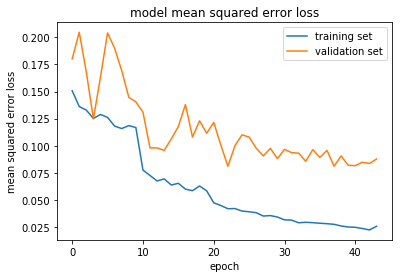

In [51]:
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

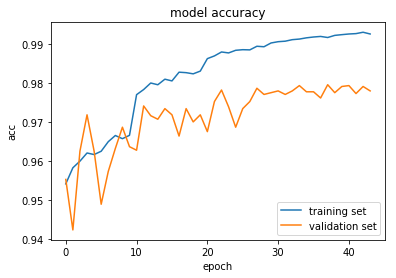

In [52]:
plt.plot(history.history['acc'][5:])
plt.plot(history.history['val_acc'][5:])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='lower right')
plt.show()

In [45]:
from keras.models import load_model

In [56]:
# load a model with the best result
# loss: 0.0140 - acc: 0.9956 - val_loss: 0.0571 - val_acc: 0.9850
model_dist = load_model('LeNet_onImadjust/m5.43-0.0906.hdf5')

### Check the model on the test data

In [57]:
model_dist.evaluate(X_test, y_one_hot_test)

12512/12630 [============================>.] - ETA: 0s

[0.09764220267423647, 0.973396674584323]

In [62]:
for file in os.listdir('LeNet_onImadjust/'):
    if file.endswith('hdf5'):
        model = load_model('LeNet_onImadjust/'+file)
        res = model.evaluate(X_test, y_one_hot_test)
        print(file, res)

12630/12630 [==============================] - 3s     
m5.12-0.1693.hdf5 [0.17714136683412327, 0.95304829772275679]
12630/12630 [==============================] - 3s     
m5.26-0.1007.hdf5 [0.10530374150970982, 0.96983372929166067]
12630/12630 [==============================] - 3s     
m5.27-0.0810.hdf5 [0.12302538862190875, 0.96935866988092212]
12630/12630 [==============================] - 4s     
m5.34-0.0880.hdf5 [0.10519295719098994, 0.97133808397435051]
12630/12630 [==============================] - 4s     
m5.47-0.0836.hdf5 [0.098394069837049375, 0.97403008709422012]
12608/12630 [============================>.] - ETA: 0sm5.48-0.0877.hdf5 [0.097602458931402444, 0.97276326207442598]


Not the best accuracy, comparing to the [results](http://benchmark.ini.rub.de/?section=gtsrb&subsection=results#), but this result is already impressive for me, because the model is pretty simple, and there's no need to preprocess image before

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

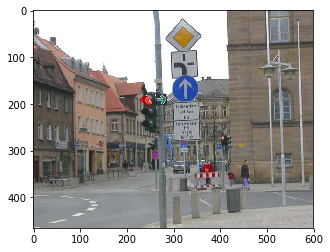

In [34]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from urllib.request import urlretrieve
url = 'http://cdn.trendhunterstatic.com/thumbs/germany-traffic.jpeg'

urlretrieve(url, 'gt.jpg')

img = imread('gt.jpg')
imshow(img)

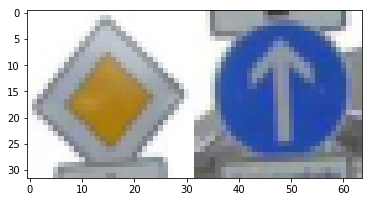

In [35]:
google_images = [imresize(img[15:95, 280:366], (32,32))]
google_images.append(imresize(img[135:205, 290:360], (32,32)))
imshow(np.hstack(google_images))

In [36]:
import os

In [37]:
# pictures are taken from the googlemaps service
dir_name = 'gmaps'
for filename in os.listdir(dir_name):
    img = imread(dir_name+'/'+filename)
    img = imresize(img, (32,32))
    google_images.append(img)
print(len(google_images))

12


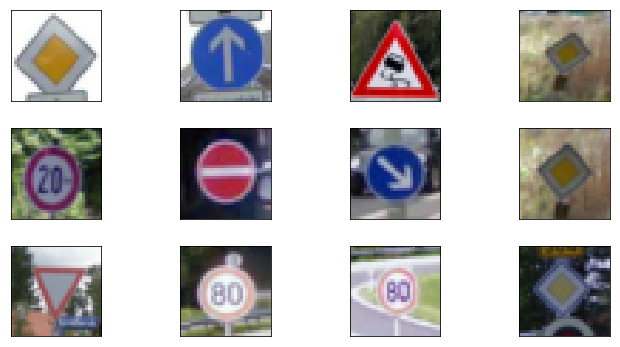

In [38]:
fig, axes = subplots(3, 4, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, img in zip(axes.flat, google_images):
    ax.imshow(img)
show()

### Predict the Sign Type for Each Image

In [58]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_i = np.array(google_images)
prediction = model_dist.predict(X_i)

In [59]:
Y_pred = [np.argsort(x)[-1] for x in prediction]

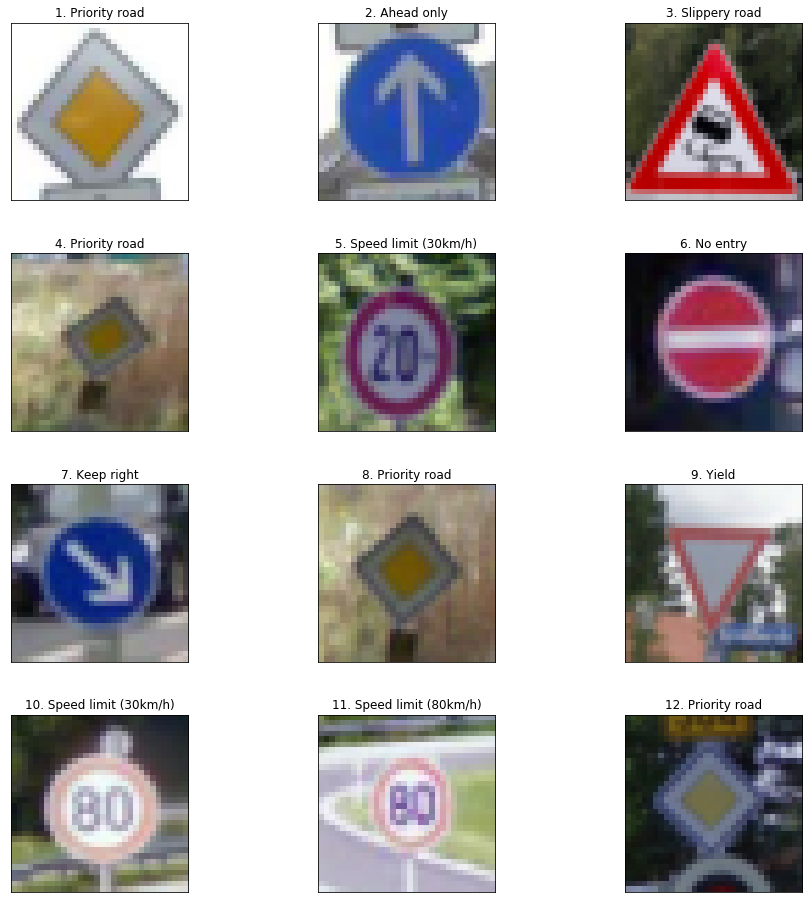

In [60]:
fig, axes = subplots(4, 3, figsize=(16, 16),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, (ax, img) in enumerate(zip(axes.flat, google_images)):
    ax.imshow(img)
    ax.set_title(str(i+1)+'. '+ signames[Y_pred[i]])
show()

In [42]:
# decoding sign number into sign name
def decode_sign(pred):
    top_5_args = np.argsort(pred)[-5:][::-1]
    top_5_prob = [pred[x] for x in top_5_args]
    top_5_label = [signames[x] for x in top_5_args]
    for sign in top_5_args:
            print("{:2} ({:.4}%): {}".format(sign, pred[sign]*100, signames[sign]))

### Let's look closer at the sign 11

 5 (63.26%): Speed limit (80km/h)
 2 (10.78%): Speed limit (50km/h)
 1 (8.729%): Speed limit (30km/h)
 7 (4.809%): Speed limit (100km/h)
 3 (4.426%): Speed limit (60km/h)


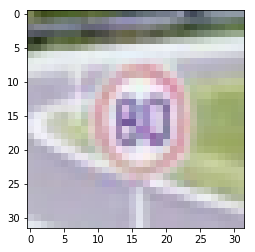

In [43]:
decode_sign(prediction[10])
imshow(google_images[10])

### Analyze Performance

The accuracy of the model on my data is 91.6% (11/12 signs were recognised correctly)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [44]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for i, pred in enumerate(prediction):
    print("\nPicture N", i+1)
    decode_sign(pred)


Picture N 1
12 (100.0%): Priority road
42 (2.656e-08%): End of no passing by vehicles over 3.5 metric tons
17 (1.081e-08%): No entry
14 (1.043e-09%): Stop
10 (1.347e-10%): No passing for vehicles over 3.5 metric tons

Picture N 2
35 (100.0%): Ahead only
33 (4.598e-06%): Turn right ahead
36 (6.145e-07%): Go straight or right
34 (4.576e-07%): Turn left ahead
37 (1.318e-07%): Go straight or left

Picture N 3
23 (100.0%): Slippery road
30 (6.483e-07%): Beware of ice/snow
19 (3.642e-07%): Dangerous curve to the left
20 (2.169e-08%): Dangerous curve to the right
31 (2.016e-08%): Wild animals crossing

Picture N 4
12 (99.99%): Priority road
42 (0.004125%): End of no passing by vehicles over 3.5 metric tons
32 (0.002868%): End of all speed and passing limits
11 (0.001484%): Right-of-way at the next intersection
41 (0.001111%): End of no passing

Picture N 5
 1 (55.29%): Speed limit (30km/h)
 7 (30.91%): Speed limit (100km/h)
 8 (6.601%): Speed limit (120km/h)
 4 (3.449%): Speed limit (70km/h)

#### It's very clear, that the model has issues with speed limit signs

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [63]:
from keras import backend as K

In [64]:
model_dist.layers[2]

In [65]:
get_3rd_layer_output = K.function([model_dist.layers[0].input, K.learning_phase()],
                                  [model_dist.layers[2].output])

layer_output = get_3rd_layer_output([X_i, 0])[0]

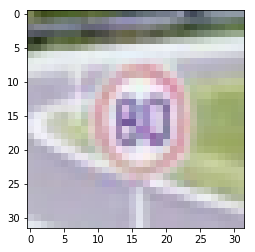

In [66]:
imshow(X_i[10])

In [67]:
# function to display images
def display(images, titles=['']):
    fig, axes = subplots(images.shape[2]//4, 4, figsize=(16,32),
                             subplot_kw={'xticks': [], 'yticks': []})

    #fig.subplots_adjust(hspace=0.3, wspace=0.1)
    for i, (ax, layer) in enumerate(zip(axes.flat, range(images.shape[2]))):
        ax.imshow(images[:,:,layer], cmap='gray', interpolation="nearest")

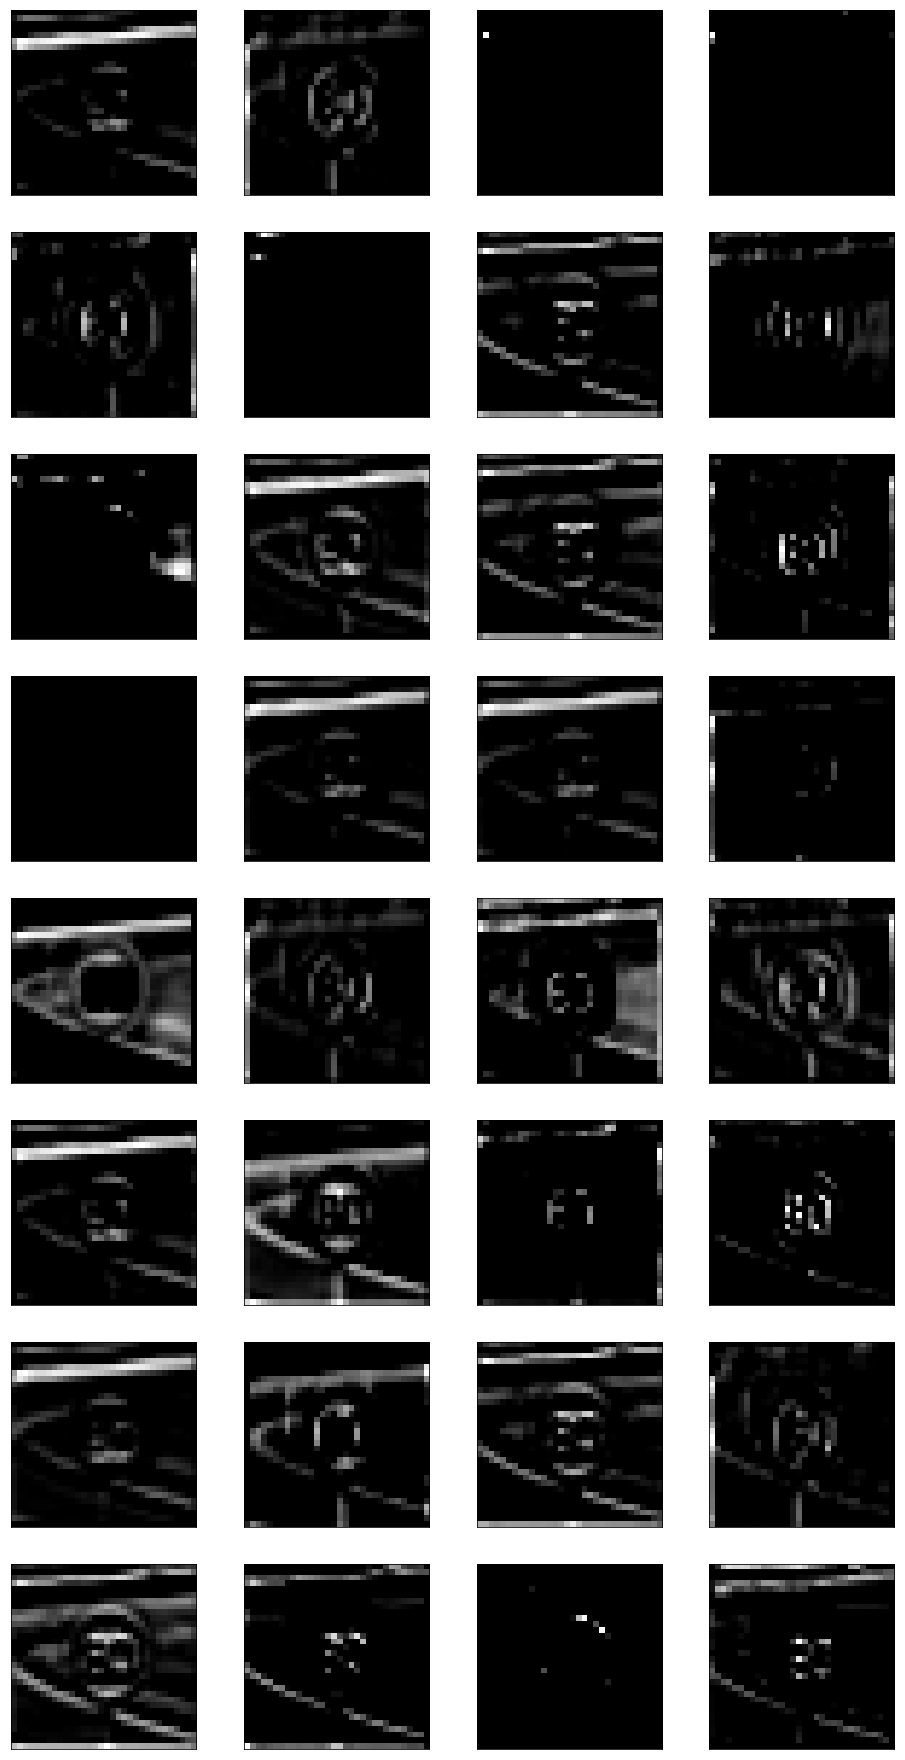

In [68]:
display(layer_output[10])

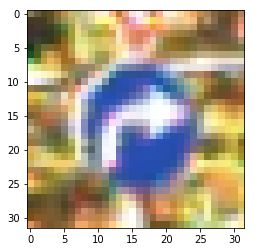

In [69]:
layer_output = get_3rd_layer_output([X_test[:16], 0])[0]
imshow(X_test[3])

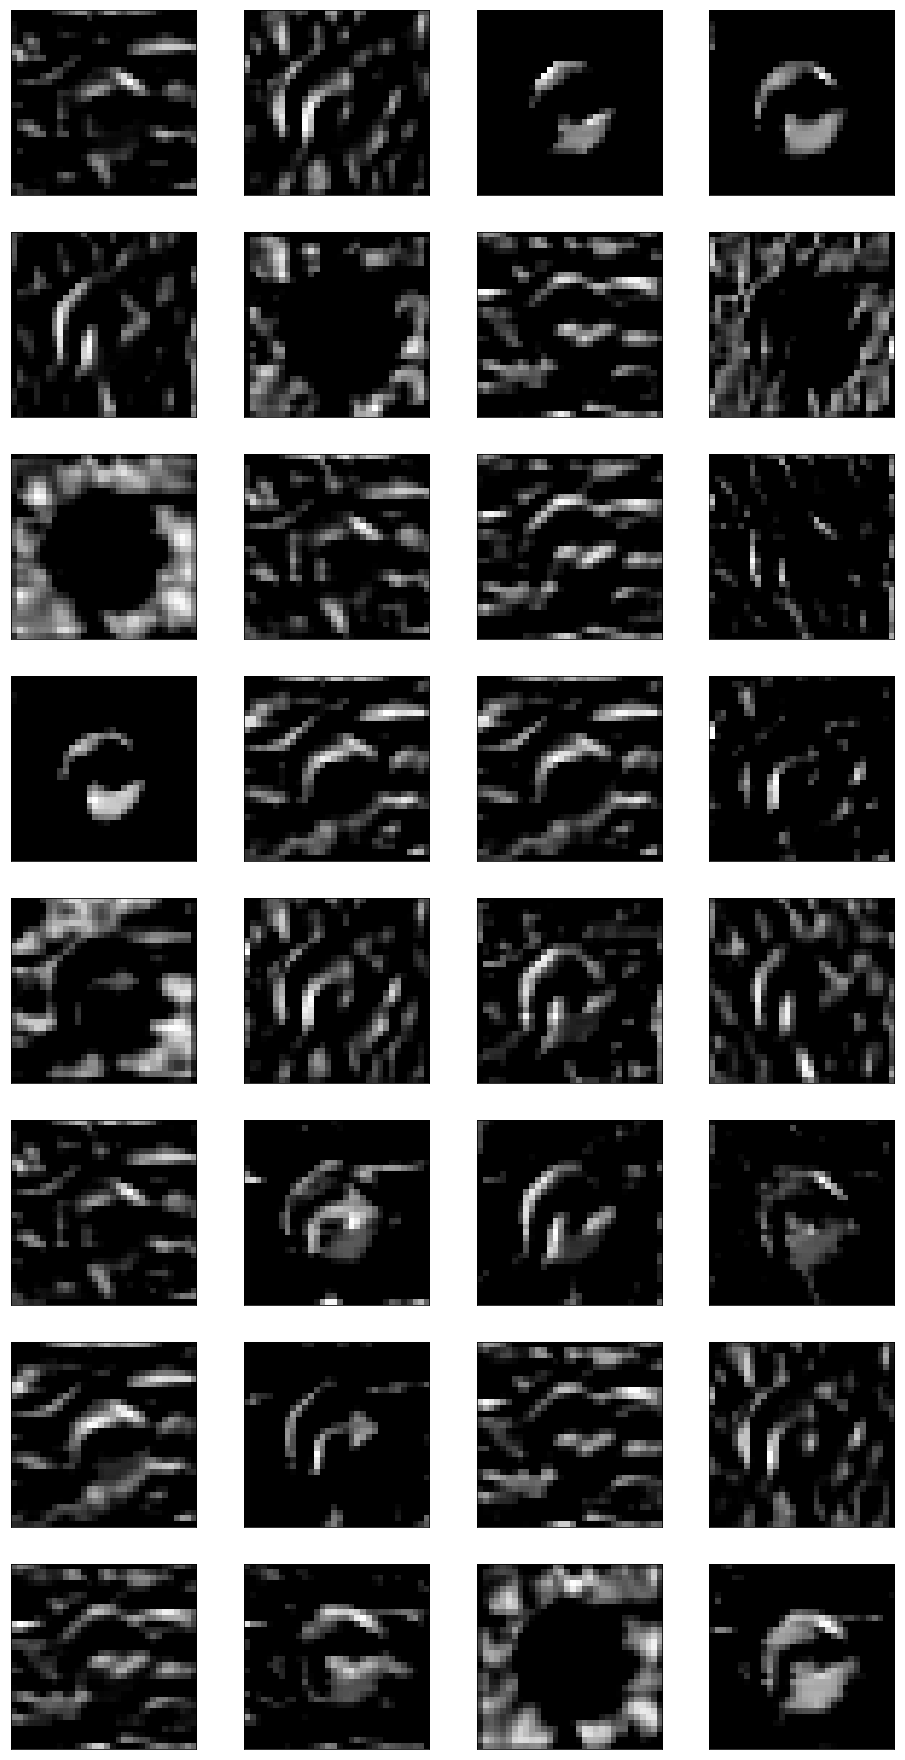

In [70]:
display(layer_output[3])